# DATA AUGMENTATION

## Loading & Inspecting Raw Data

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 15.1 MB/s eta 0:00:00


In [2]:
# 📦 Required Libraries
import pandas as pd
import numpy as np
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")



filepath= 'C:/Users/emirb/molecule_datasets/bace/raw/bace.csv'
df = pd.read_csv(filepath)
print(f"Loaded {len(df)} molecules.")
df.head()

Loaded 1513 molecules.


,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,56.657166,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,4
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,78.945702,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,5


In [3]:
# Count NaNs per column
print("\nMissing Values:\n", df.isnull().sum())

# Basic stats for numeric columns (if any)
print("\nNumerical Description:\n", df.describe(include=[np.number]))


Missing Values:
 mol                0
CID                0
Class              0
Model              0
pIC50              0
                  ..
PEOE11 (PEOE11)    0
PEOE12 (PEOE12)    0
PEOE13 (PEOE13)    0
PEOE14 (PEOE14)    0
canvasUID          0
Length: 595, dtype: int64

Numerical Description:
              Class        pIC50           MW        AlogP          HBA  \
count  1513.000000  1513.000000  1513.000000  1513.000000  1513.000000   
mean      0.456709     6.521991   479.661988     3.177080     3.732981   
std       0.498287     1.342417   122.083053     1.396633     1.444778   
min       0.000000     2.544546   138.187000    -4.361100     0.000000   
25%       0.000000     5.585027   389.331300     2.335500     3.000000   
50%       0.000000     6.761954   463.628300     3.171300     4.000000   
75%       1.000000     7.540000   564.639530     4.015500     4.000000   
max       1.000000    10.522879  1350.473300     7.617400    12.000000   

               HBD           RB  

In [4]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Class Distribution ---")
print(df['Class'].value_counts())

print("\n--- Sample SMILES ---")
print(df['mol'].head(10).tolist())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Columns: 595 entries, mol to canvasUID
dtypes: float64(210), int64(382), object(3)
memory usage: 6.9+ MB
None

--- Class Distribution ---
Class
0    822
1    691
Name: count, dtype: int64

--- Sample SMILES ---
['O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2ccccc2C)C)CC1(C)C', 'Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(=O)C)(CC(C)C)C1=O)CCc1ccccc1)[C@H](O)[C@@H]1[NH2+]C[C@H](OCCC)C1', 'S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H]([C@H](O)C[NH2+]Cc1cc(OC)ccc1)Cc1ccccc1)C', 'S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c(N)c(F)c2)[C@H](O)[C@@H]([NH2+]Cc2cc(ccc2)C(C)(C)C)C1', 'S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H]([C@H](O)C[NH2+]Cc1cc(ccc1)C(F)(F)F)Cc1ccccc1)C', 'S1(=O)C[C@@H](Cc2cc(OC(C(F)(F)F)C(F)(F)F)c(N)c(F)c2)[C@H](O)[C@@H]([NH2+]Cc2cc(ccc2)C(C)(C)C)C1', 'S(=O)(=O)(CCCCC)C[C@@H](NC(=O)c1cccnc1)C(=O)N[C@H]([C@H](O)C[NH2+]Cc1cc(ccc1)CC)Cc1cc(F)cc(F)c1', 'Fc1c2c(ccc1)[C@@]([NH+]=

In [5]:
# Duplicated rows (full)
dup_rows = df.duplicated()
print(f"Full duplicate rows: {dup_rows.sum()}")

# Duplicated SMILES
if 'smiles' in df.columns:
    dup_smiles = df['smiles'].duplicated()
    print(f"Duplicate SMILES: {dup_smiles.sum()}")

Full duplicate rows: 0


In [6]:
def is_valid_smiles(smiles):
    return Chem.MolFromSmiles(smiles) is not None

df['valid_smiles'] = df['mol'].apply(is_valid_smiles)

In [7]:
# Define function to check SMILES validity
from rdkit import Chem

def is_valid_smiles(smiles: str) -> bool:
    return Chem.MolFromSmiles(smiles) is not None

df['valid_smiles'] = df['mol'].apply(is_valid_smiles)
initial_count = len(df)
df = df[df['valid_smiles']]
print(f"Valid SMILES: {len(df)} / {initial_count}")

Valid SMILES: 1513 / 1513


In [8]:
# 2.4 Check for Missing Values
print("\n--- Missing Values ---")
print(df.isna().sum())


--- Missing Values ---
mol                0
CID                0
Class              0
Model              0
pIC50              0
                  ..
PEOE12 (PEOE12)    0
PEOE13 (PEOE13)    0
PEOE14 (PEOE14)    0
canvasUID          0
valid_smiles       0
Length: 596, dtype: int64


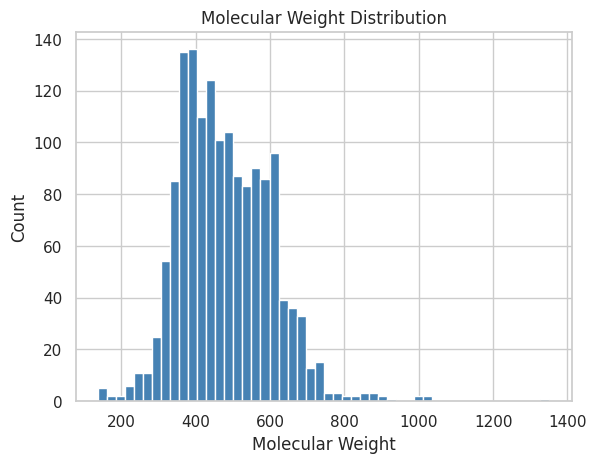

In [9]:
from rdkit import RDLogger
from rdkit.Chem import Descriptors

RDLogger.DisableLog('rdApp.*')  # Hide RDKit warnings

def safe_molwt(smiles: str):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Descriptors.MolWt(mol)
    return None

df['MolWt'] = df['mol'].apply(safe_molwt)

# Drop NaNs before plotting
df_no_nan = df.dropna(subset=['MolWt'])

plt.hist(df_no_nan['MolWt'], bins=50, color='steelblue')
plt.xlabel("Molecular Weight")
plt.ylabel("Count")
plt.title("Molecular Weight Distribution")
plt.grid(True)
plt.show()

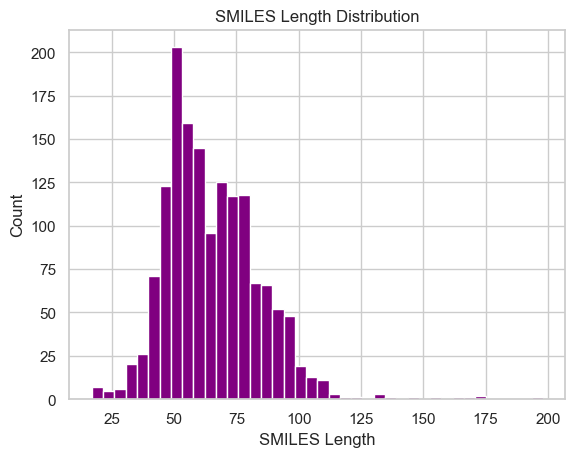

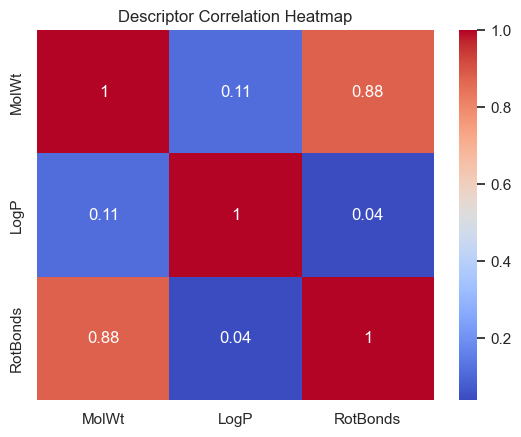

In [6]:
df['smiles_len'] = df['mol'].apply(len)

plt.hist(df['smiles_len'], bins=40, color='purple')
plt.xlabel("SMILES Length")
plt.ylabel("Count")
plt.title("SMILES Length Distribution")
plt.grid(True)
plt.show()

from rdkit.Chem import Descriptors
def plot_descriptor_correlation_heatmap(df):
    def calc_descriptors(smiles):
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return [None, None, None]
        return [
            Descriptors.MolWt(mol),
            Descriptors.MolLogP(mol),
            Descriptors.NumRotatableBonds(mol)
        ]

    desc = df['mol'].apply(calc_descriptors)
    desc_df = pd.DataFrame(desc.tolist(), columns=['MolWt', 'LogP', 'RotBonds'])
    desc_df = desc_df.dropna()
    corr = desc_df.corr()

    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Descriptor Correlation Heatmap")
    plt.show()

plot_descriptor_correlation_heatmap(df)

In [11]:
from collections import Counter

def extract_atom_symbols(smiles: str):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return []
    return [atom.GetSymbol() for atom in mol.GetAtoms()]

atom_counter = Counter()

for s in df['mol']:
    atom_counter.update(extract_atom_symbols(s))

# Top 10 most frequent atom types
common_atoms = atom_counter.most_common(10)

print("🔬 Top 10 Atom Types:")
for atom, count in common_atoms:
    print(f"{atom}: {count}")

🔬 Top 10 Atom Types:
C: 39055
N: 5453
O: 4586
F: 1721
S: 499
Cl: 218
Br: 41
I: 4


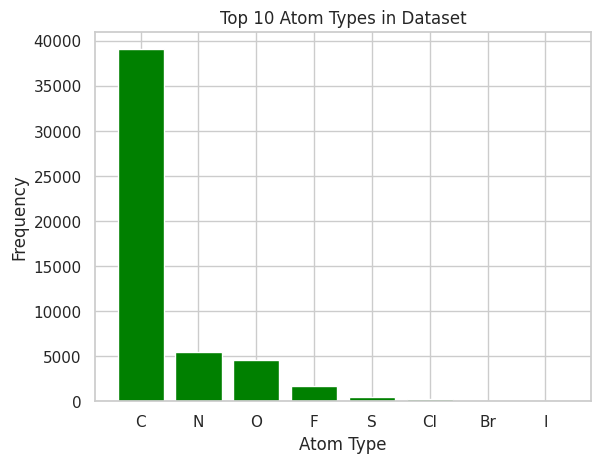

In [12]:
atoms, counts = zip(*common_atoms)

plt.bar(atoms, counts, color='green')
plt.xlabel("Atom Type")
plt.ylabel("Frequency")
plt.title("Top 10 Atom Types in Dataset")
plt.grid(True)
plt.show()

## SMILES Validation & Cleaning

In [13]:
df_valid = df[df['valid_smiles']].copy()

In [14]:
df_valid = df_valid[df_valid['mol'].notnull()]
df_valid = df_valid[df_valid['mol'].apply(lambda x: isinstance(x, str) and x.strip() != '')]

In [15]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

def strict_validate(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

df_valid = df_valid[df_valid['mol'].apply(strict_validate)]

In [16]:
original_count = len(df)
valid_count = len(df_valid)
dropped_count = original_count - valid_count

print(f"Original rows: {original_count}")
print(f"Valid SMILES rows: {valid_count}")
print(f"Dropped rows: {dropped_count}")

Original rows: 1513
Valid SMILES rows: 1513
Dropped rows: 0


In [ ]:
df_dropped = df[~df.index.isin(df_valid.index)]
df_dropped.to_csv("bace_dropped_invalid_smiles.csv", index=False)
df_valid.reset_index(drop=True, inplace=True)

In [18]:
df_valid.reset_index(drop=True, inplace=True)

## Basline Feature Extraction

In [19]:
df.columns = df.columns.str.lower()  # Makes all column names lowercase

In [20]:
print(df.columns)

Index(['mol', 'cid', 'class', 'model', 'pic50', 'mw', 'alogp', 'hba', 'hbd',
       'rb',
       ...
       'peoe9 (peoe9)', 'peoe10 (peoe10)', 'peoe11 (peoe11)',
       'peoe12 (peoe12)', 'peoe13 (peoe13)', 'peoe14 (peoe14)', 'canvasuid',
       'valid_smiles', 'molwt', 'smiles_len'],
      dtype='object', length=598)


In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd

# Morgan fingerprint function
def smiles_to_morgan_fp(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)
    arr = np.zeros((nBits,), dtype=np.int8)
    Chem.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

# Apply to the valid SMILES column
df['morgan_fp'] = df['mol'].apply(smiles_to_morgan_fp)

# Drop entries where fingerprint generation failed (None)
df = df[df['morgan_fp'].notna()].reset_index(drop=True)

# Stack into a numpy array and save
fingerprint_matrix = np.stack(df['morgan_fp'].values)

# Optional: Save for later use
np.save('baseline_fps.npy', fingerprint_matrix)

print(f"Morgan fingerprint matrix shape: {fingerprint_matrix.shape}")

Morgan fingerprint matrix shape: (1513, 2048)


In [22]:
!pip install torch torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [23]:
import torch
from torch_geometric.data import Data
from rdkit.Chem import rdmolops

# Atom feature extractor
def atom_features(atom):
    return torch.tensor([
        atom.GetAtomicNum(),
        atom.GetDegree(),
        atom.GetFormalCharge(),
        atom.GetHybridization().real,
        atom.GetTotalNumHs(),
        int(atom.GetIsAromatic())
    ], dtype=torch.float)

# Bond feature extractor
def bond_features(bond):
    return torch.tensor([
        int(bond.GetBondTypeAsDouble()),
        int(bond.GetIsConjugated()),
        int(bond.IsInRing())
    ], dtype=torch.float)

# SMILES to PyG Graph
def smiles_to_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    # Nodes
    atom_feats = [atom_features(atom) for atom in mol.GetAtoms()]
    x = torch.stack(atom_feats)

    # Edges
    edge_index = []
    edge_attr = []

    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()

        edge_index.append((i, j))
        edge_index.append((j, i))

        bf = bond_features(bond)
        edge_attr.append(bf)
        edge_attr.append(bf)

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.stack(edge_attr)

    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr)

# Apply to dataset
graph_list = []
for smiles in df['mol']:
    g = smiles_to_graph(smiles)
    if g is not None:
        graph_list.append(g)

# Save graphs
torch.save(graph_list, 'baseline_graphs.pt')

print(f"✅ Converted {len(graph_list)} molecules into graphs.")

✅ Converted 1513 molecules into graphs.


## Choosing, Configuring & Implementing Augmentation Functions

In [24]:
AUGMENTATION_CONFIG = {
    'random_smiles': 5,
    'tautomers': 3,
}

In [25]:
from rdkit.Chem.MolStandardize import rdMolStandardize

In [26]:
def randomize_smiles(smiles, n=5):
    """Generate n randomized SMILES for a given molecule."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return []

    randomized = set()
    for _ in range(n * 2):  # try extra in case of duplicates
        new_smiles = Chem.MolToSmiles(mol, doRandom=True)
        randomized.add(new_smiles)
        if len(randomized) >= n:
            break
    return list(randomized)

In [ ]:
def randomize_smiles(smiles, n=5):
    """Generate n randomized SMILES for a given molecule."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return []

    randomized = set()
    for _ in range(n * 2):  # try extra in case of duplicates
        new_smiles = Chem.MolToSmiles(mol, doRandom=True)
        randomized.add(new_smiles)
        if len(randomized) >= n:
            break
    return list(randomized)

def enumerate_tautomers(smiles, max_tautomers=3):
    """Enumerate tautomers using RDKit standardizer."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return []

    enumerator = rdMolStandardize.TautomerEnumerator()
    tautomers = enumerator.Enumerate(mol)

    unique_smiles = set()
    for t in tautomers:
        s = Chem.MolToSmiles(t, canonical=True)
        unique_smiles.add(s)
        if len(unique_smiles) >= max_tautomers:
            break

    return list(unique_smiles)

augmented_records = []

for smiles in df['mol']:
    if Chem.MolFromSmiles(smiles) is None:
        continue

    # Original
    augmented_records.append((smiles, 'original'))

    # Random SMILES
    for aug in randomize_smiles(smiles, n=5):
        augmented_records.append((aug, 'random_smiles'))

    # Tautomers
    for taut in enumerate_tautomers(smiles, max_tautomers=3):
        augmented_records.append((taut, 'tautomer'))

aug_df = pd.DataFrame(augmented_records, columns=['augmented_smiles', 'augmentation_type'])
aug_df.to_csv('augmented_bace_smiles.csv', index=False)

print(f"✅ Generated {len(aug_df)} total SMILES: {aug_df['augmentation_type'].value_counts().to_dict()}")

In [28]:
augmented_records = []

for smiles in df['mol']:
    if Chem.MolFromSmiles(smiles) is None:
        continue

    # Original
    augmented_records.append((smiles, 'original'))

    # Random SMILES
    for aug in randomize_smiles(smiles, n=5):
        augmented_records.append((aug, 'random_smiles'))

    # Tautomers
    for taut in enumerate_tautomers(smiles, max_tautomers=3):
        augmented_records.append((taut, 'tautomer'))

In [29]:
aug_df = pd.DataFrame(augmented_records, columns=['augmented_smiles', 'augmentation_type'])
aug_df.to_csv('augmented_bace_smiles.csv', index=False)

print(f"✅ Generated {len(aug_df)} total SMILES: {aug_df['augmentation_type'].value_counts().to_dict()}")

✅ Generated 12731 total SMILES: {'random_smiles': 7565, 'tautomer': 3653, 'original': 1513}


## Generating & Validating Augmented SMILES

In [30]:
unique_augmented = set()
augmented_rows = []

def is_valid(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

for original_smiles in df['mol']:
    # Include original
    if original_smiles not in unique_augmented:
        augmented_rows.append((original_smiles, original_smiles, 'original'))
        unique_augmented.add(original_smiles)

    # Random SMILES
    for rand_smiles in randomize_smiles(original_smiles, n=5):
        if is_valid(rand_smiles) and rand_smiles not in unique_augmented:
            augmented_rows.append((original_smiles, rand_smiles, 'random_smiles'))
            unique_augmented.add(rand_smiles)

    # Tautomers
    for taut in enumerate_tautomers(original_smiles, max_tautomers=3):
        if is_valid(taut) and taut not in unique_augmented:
            augmented_rows.append((original_smiles, taut, 'tautomer'))
            unique_augmented.add(taut)

# Convert to DataFrame
aug_df = pd.DataFrame(augmented_rows, columns=['original_smiles', 'augmented_smiles', 'augmentation_type'])

# Save intermediate CSV
aug_df.to_csv('augmented_bace_smiles.csv', index=False)

print("✅ SMILES Augmentation Complete:")
print(f"Originals: {len(df)}")
print(f"Augmented (total): {len(aug_df)}")
print(aug_df['augmentation_type'].value_counts())

✅ SMILES Augmentation Complete:
Originals: 1513
Augmented (total): 12724
augmentation_type
random_smiles    7565
tautomer         3646
original         1513
Name: count, dtype: int64


## Converting Augmented SMILES to Graphs

In [ ]:
unique_augmented = set()
augmented_rows = []

def is_valid(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

for original_smiles in df['mol']:
    # Include original
    if original_smiles not in unique_augmented:
        augmented_rows.append((original_smiles, original_smiles, 'original'))
        unique_augmented.add(original_smiles)

    # Random SMILES
    for rand_smiles in randomize_smiles(original_smiles, n=5):
        if is_valid(rand_smiles) and rand_smiles not in unique_augmented:
            augmented_rows.append((original_smiles, rand_smiles, 'random_smiles'))
            unique_augmented.add(rand_smiles)

    # Tautomers
    for taut in enumerate_tautomers(original_smiles, max_tautomers=3):
        if is_valid(taut) and taut not in unique_augmented:
            augmented_rows.append((original_smiles, taut, 'tautomer'))
            unique_augmented.add(taut)

# Convert to DataFrame
aug_df = pd.DataFrame(augmented_rows, columns=['original_smiles', 'augmented_smiles', 'augmentation_type'])

# Save intermediate CSV
aug_df.to_csv('augmented_bace_smiles.csv', index=False)

print("✅ SMILES Augmentation Complete:")
print(f"Originals: {len(df)}")
print(f"Augmented (total): {len(aug_df)}")
print(aug_df['augmentation_type'].value_counts())
# Reusing my existing function: smiles_to_graph(smiles: str) -> Data
aug_graphs = []
failed_smiles = []

for s in aug_df['augmented_smiles']:
    g = smiles_to_graph(s)
    if g is not None:
        aug_graphs.append(g)
    else:
        failed_smiles.append(s)

# Save the valid graph list
torch.save(aug_graphs, 'augmented_bace_graphs.pt')

# Saving failed SMILES to CSV for review
pd.DataFrame(failed_smiles, columns=["failed_smiles"]).to_csv("failed_augmented_smiles.csv", index=False)

# ✅ Log stats
print("✅ Graph Conversion Complete:")
print(f"✔️  Total SMILES input: {len(aug_df)}")
print(f"✅ Successfully converted: {len(aug_graphs)}")
print(f"❌ Failed to convert: {len(failed_smiles)}")

from rdkit.Chem.Scaffolds import MurckoScaffold
from sklearn.model_selection import train_test_split
from collections import defaultdict
import pickle
import random

# Step 1: Get scaffold for each original SMILES
def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    return Chem.MolToSmiles(scaffold)

# Compute scaffolds for each original SMILES (not augmented ones)
aug_df['scaffold'] = aug_df['original_smiles'].apply(get_scaffold)

# Group original SMILES by scaffold
scaffold_to_smiles = defaultdict(list)
for orig, scaf in zip(aug_df['original_smiles'], aug_df['scaffold']):
    scaffold_to_smiles[scaf].append(orig)

# Deduplicate SMILES per scaffold
scaffold_sets = list(scaffold_to_smiles.values())
scaffold_sets = [list(set(s)) for s in scaffold_sets]

# Shuffle reproducibly
random.seed(42)
random.shuffle(scaffold_sets)

# Assign scaffold groups to splits
train, valtest = train_test_split(scaffold_sets, test_size=0.2, random_state=42)
val, test = train_test_split(valtest, test_size=0.5, random_state=42)

# Flatten the lists
train_smiles = set(s for group in train for s in group)
val_smiles = set(s for group in val for s in group)
test_smiles = set(s for group in test for s in group)

# Assign split label to each row
def assign_split(orig_smiles):
    if orig_smiles in train_smiles:
        return 'train'
    elif orig_smiles in val_smiles:
        return 'val'
    elif orig_smiles in test_smiles:
        return 'test'
    return 'unknown'

aug_df['split'] = aug_df['original_smiles'].apply(assign_split)

# ✅ Sanity check
print("✅ Split Summary:")
print(aug_df['split'].value_counts())

# Step 5: Save indices to disk
train_idx = aug_df[aug_df['split'] == 'train'].index.tolist()
val_idx = aug_df[aug_df['split'] == 'val'].index.tolist()
test_idx = aug_df[aug_df['split'] == 'test'].index.tolist()

with open('aug_train_idx.pkl', 'wb') as f:
    pickle.dump(train_idx, f)
with open('aug_val_idx.pkl', 'wb') as f:
    pickle.dump(val_idx, f)
with open('aug_test_idx.pkl', 'wb') as f:
    pickle.dump(test_idx, f)

# 1. Unique split labels
print("🔍 Unique splits:", aug_df['split'].unique())

# 2. Confirm no SMILES appears in more than one split
grouped = aug_df.groupby('original_smiles')['split'].nunique()
leaked = grouped[grouped > 1]
print(f"🔍 Leaking original SMILES: {len(leaked)}")  # Should be 0

# 3. Split counts
print("📊 Split distribution:")
print(aug_df['split'].value_counts())

# 4. Check that augmented SMILES match their original's split
mismatch = aug_df[aug_df['split'] != aug_df.groupby('original_smiles')['split'].transform('first')]
print(f"❌ Mismatched augmentations: {len(mismatch)}")  # Should be 0

# 5. Scaffold NaNs
print("🧪 Scaffold NaNs:", aug_df['scaffold'].isna().sum())  # Should be 0 or very few

✅ Graph Conversion Complete:
✔️  Total SMILES input: 12724
✅ Successfully converted: 12724
❌ Failed to convert: 0


## Merging & Labeling Dataset Splits

In [32]:
from rdkit.Chem.Scaffolds import MurckoScaffold
from sklearn.model_selection import train_test_split
from collections import defaultdict
import pickle
import random

# Step 1: Get scaffold for each original SMILES
def get_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    return Chem.MolToSmiles(scaffold)

# Compute scaffolds for each original SMILES (not augmented ones)
aug_df['scaffold'] = aug_df['original_smiles'].apply(get_scaffold)

# Group original SMILES by scaffold
scaffold_to_smiles = defaultdict(list)
for orig, scaf in zip(aug_df['original_smiles'], aug_df['scaffold']):
    scaffold_to_smiles[scaf].append(orig)

# Deduplicate SMILES per scaffold
scaffold_sets = list(scaffold_to_smiles.values())
scaffold_sets = [list(set(s)) for s in scaffold_sets]

# Shuffle reproducibly
random.seed(42)
random.shuffle(scaffold_sets)

# Assign scaffold groups to splits
train, valtest = train_test_split(scaffold_sets, test_size=0.2, random_state=42)
val, test = train_test_split(valtest, test_size=0.5, random_state=42)

# Flatten the lists
train_smiles = set(s for group in train for s in group)
val_smiles = set(s for group in val for s in group)
test_smiles = set(s for group in test for s in group)

# Assign split label to each row
def assign_split(orig_smiles):
    if orig_smiles in train_smiles:
        return 'train'
    elif orig_smiles in val_smiles:
        return 'val'
    elif orig_smiles in test_smiles:
        return 'test'
    return 'unknown'

aug_df['split'] = aug_df['original_smiles'].apply(assign_split)

# ✅ Sanity check
print("✅ Split Summary:")
print(aug_df['split'].value_counts())

# Step 5: Save indices to disk
train_idx = aug_df[aug_df['split'] == 'train'].index.tolist()
val_idx = aug_df[aug_df['split'] == 'val'].index.tolist()
test_idx = aug_df[aug_df['split'] == 'test'].index.tolist()

with open('aug_train_idx.pkl', 'wb') as f:
    pickle.dump(train_idx, f)
with open('aug_val_idx.pkl', 'wb') as f:
    pickle.dump(val_idx, f)
with open('aug_test_idx.pkl', 'wb') as f:
    pickle.dump(test_idx, f)

✅ Split Summary:
split
train    10762
val        995
test       967
Name: count, dtype: int64


## Sanity check on aug_df

In [33]:
# 1. Unique split labels
print("🔍 Unique splits:", aug_df['split'].unique())

# 2. Confirm no SMILES appears in more than one split
grouped = aug_df.groupby('original_smiles')['split'].nunique()
leaked = grouped[grouped > 1]
print(f"🔍 Leaking original SMILES: {len(leaked)}")  # Should be 0

# 3. Split counts
print("📊 Split distribution:")
print(aug_df['split'].value_counts())

# 4. Check that augmented SMILES match their original's split
mismatch = aug_df[aug_df['split'] != aug_df.groupby('original_smiles')['split'].transform('first')]
print(f"❌ Mismatched augmentations: {len(mismatch)}")  # Should be 0

# 5. Scaffold NaNs
print("🧪 Scaffold NaNs:", aug_df['scaffold'].isna().sum())  # Should be 0 or very few

🔍 Unique splits: ['train' 'test' 'val']
🔍 Leaking original SMILES: 0
📊 Split distribution:
split
train    10762
val        995
test       967
Name: count, dtype: int64
❌ Mismatched augmentations: 0
🧪 Scaffold NaNs: 0


## SAVE

In [34]:
aug_df.to_csv('augmented_bace_smiles.csv', index=False)
print("💾 Saved: augmented_bace_smiles.csv")

💾 Saved: augmented_bace_smiles.csv


In [ ]:
aug_df.to_csv('augmented_bace_smiles.csv', index=False)
print("💾 Saved: augmented_bace_smiles.csv")
import shutil
shutil.make_archive('bace_data_aug', 'zip', '/content/bace_data_aug')

from google.colab import files
files.download('bace_data_aug.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
!ls -lh /content/bace_data_aug

total 54M
-rw-r--r-- 1 root root  46M May 31 13:40 augmented_bace_graphs.pt
-rw-r--r-- 1 root root 2.4M May 31 13:41 augmented_bace_smiles.csv
-rw-r--r-- 1 root root 2.9K May 31 13:41 aug_test_idx.pkl
-rw-r--r-- 1 root root  32K May 31 13:41 aug_train_idx.pkl
-rw-r--r-- 1 root root 3.0K May 31 13:41 aug_val_idx.pkl
-rw-r--r-- 1 root root  12K May 31 13:36 bace_dropped_invalid_smiles.csv
-rw-r--r-- 1 root root 5.4M May 31 13:38 baseline_graphs.pt
-rw-r--r-- 1 root root   14 May 31 13:40 failed_augmented_smiles.csv
